In [1]:
# import zipfile

# zip_file_paths = ['trainImages.zip', 'validationImages.zip']

# for path in zip_file_paths:
#     name = str(path)
#     with zipfile.ZipFile(path, "r") as zip_ref:
#         zip_ref.extractall(f'unzipped/{name.split(".")[0]}')

In [2]:
import pandas as pd

df_validation = pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/validationImages/labels/detections.csv")
df_validation.head()

ImageID  Source LabelName  Confidence      XMin      XMax  \
0  0001eeaf4aed83f9  xclick  /m/0cmf2           1  0.022673  0.964201   
1  000595fe6fee6369  xclick  /m/02wbm           1  0.000000  1.000000   
2  000595fe6fee6369  xclick  /m/02xwb           1  0.141384  0.179676   
3  000595fe6fee6369  xclick  /m/02xwb           1  0.213549  0.253314   
4  000595fe6fee6369  xclick  /m/02xwb           1  0.232695  0.288660   

       YMin      YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
0  0.071038  0.800546           0            0          0            0   
1  0.000000  1.000000           0            0          1            0   
2  0.676275  0.731707           0            0          0            0   
3  0.299335  0.354767           1            0          0            0   
4  0.490022  0.545455           1            0          0            0   

   IsInside  
0         0  
1         0  
2         0  
3         0  
4         0

In [3]:
df_train= pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/trainImages/labels/detections.csv")
df_train.head()

ImageID  Source  LabelName  Confidence      XMin      XMax  \
0  000002b66c9c498e  xclick  /m/01g317           1  0.012500  0.195312   
1  000002b66c9c498e  xclick  /m/01g317           1  0.025000  0.276563   
2  000002b66c9c498e  xclick  /m/01g317           1  0.151562  0.310937   
3  000002b66c9c498e  xclick  /m/01g317           1  0.256250  0.429688   
4  000002b66c9c498e  xclick  /m/01g317           1  0.257812  0.346875   

       YMin      YMax  IsOccluded  IsTruncated  ...  IsDepiction  IsInside  \
0  0.148438  0.587500           0            1  ...            0         0   
1  0.714063  0.948438           0            1  ...            0         0   
2  0.198437  0.590625           1            0  ...            0         0   
3  0.651563  0.925000           1            0  ...            0         0   
4  0.235938  0.385938           1            0  ...            0         0   

   XClick1X  XClick2X  XClick3X  XClick4X  XClick1Y  XClick2Y  XClick3Y  \
0  0.148438  0.012500  0.059375  0.195312  0.148438  0.357812  0.587500   
1  0.025000  0.248438  0.276563  0.214062  0.914062  0.714063  0.782813   
2  0.243750  0.151562  0.310937  0.262500  0.198437  0.434375  0.507812   
3  0.315625  0.429688  0.256250  0.423438  0.651563  0.921875  0.826562   
4  0.317188  0.257812  0.346875  0.307812  0.235938  0.289062  0.348438   

   XClick4Y  
0  0.325000  
1  0.948438  
2  0.590625  
3  0.925000  
4  0.385938  

[5 rows x 21 columns]

In [4]:
len(df_train)

14610229

In [5]:
data_path_validation = "/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/*.jpg"
data_path_train = "/Users/bilensezgin/Documents/Courses/unzipped/trainImages/data/*.jpg"

In [6]:
import glob
counter = 0
img_paths = data_path_train
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

517


In [7]:
counter = 0
img_paths = data_path_validation
folder = glob.glob(img_paths)

for i in folder:
    counter+=1
print(counter)

9


In [8]:
import glob

train_list_ids = []
validation_list_ids = []

def get_ids(split, print_this, to_append_list):
    start = 0
    end = 0 
    if split == data_path_train:
        start,end = 26,42
    elif split == data_path_validation:
        start,end = 31, 47
    else:
        raise Exception("Invalid Parameter")
    folder = split
    img_paths = glob.glob(folder)
    img_ids = to_append_list
    
    for i in img_paths:
        id = i[start:end]
        img_ids.append(id)
        
    print(len(img_ids))
    print(print_this)
    

In [9]:
get_ids(data_path_train, "task finished", train_list_ids)

517
task finished


In [10]:
train_list_ids[0]

'ts/Courses/unzip'

In [11]:
get_ids(data_path_validation, "task finished", validation_list_ids)

9
task finished


In [12]:
train_classes_df = pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/trainImages/metadata/classes.csv", names=["className", "Object"])
validation_classes_df = pd.read_csv("/Users/bilensezgin/Documents/Courses/unzipped/validationImages/metadata/classes.csv", names=["className", "Object"])

In [13]:
train_identifier = train_classes_df[train_classes_df["Object"]=="Plastic bag"]
validation_identifier = validation_classes_df[validation_classes_df["Object"] == "Plastic bag"]

print(f"Train identifier: {train_identifier}")
print(f"Validation indentifier: {validation_identifier}")

Train identifier:      className       Object
327  /m/05gqfk  Plastic bag
Validation indentifier:      className       Object
327  /m/05gqfk  Plastic bag


In [14]:
import random

def random_row_from_df(split):
    dataframe = ""
    
    if split == "train":
        dataframe, ids_to_check = df_train, train_list_ids
    elif split == "validation":
        dataframe, ids_to_check = df_validation, validation_list_ids
    else:
        raise Exception("Invalid parameter, must be train or validation")
    
    img_ids_len = len(ids_to_check)
    rand = random.randint(0,img_ids_len-1)
    id = ids_to_check[rand]
    print(id)
    r = dataframe.loc[(dataframe.ImageID == id) & (dataframe.LabelName == "/m/05gqfk")]
    print(r) 

In [15]:
random_row_from_df("train")

ts/Courses/unzip
Empty DataFrame
Columns: [ImageID, Source, LabelName, Confidence, XMin, XMax, YMin, YMax, IsOccluded, IsTruncated, IsGroupOf, IsDepiction, IsInside, XClick1X, XClick2X, XClick3X, XClick4X, XClick1Y, XClick2Y, XClick3Y, XClick4Y]
Index: []

[0 rows x 21 columns]


In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from PIL import Image

validation_images_path = "/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/*.jpg"
train_images_path = "/Users/bilensezgin/Documents/Courses/unzipped/trainImages/data/*.jpg"

def visulize_random_image(split):
    split_path = train_images_path if split == "train" else validation_images_path if split == "validation" else 0
    if split_path == 0:
        raise Exception("Invalid input parameter, must be train or validation")
    images_folder = split_path
    images_paths = glob.glob(images_folder)
    num_of_images = len(images_paths)
    random_int = random.randint(0, num_of_images-1)
    random_image = images_paths[random_int]
    img = mpimg.imread(random_image)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.imshow(img)
    plt.show()

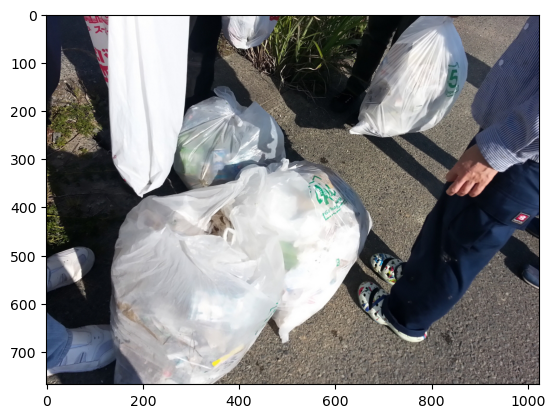

In [17]:
visulize_random_image("train")

In [18]:
def visualize_many(from_num, to_num, dataset):
    columns = 4
    rows = 5
    dataset_path = train_images_path if dataset == "train" else validation_images_path if dataset == "validation" else 0
    if dataset_path == 0:
        raise Exception("Invalid input parameter, must be train or validation")
    fig = plt.figure(figsize=(20,20))
    images_paths = glob.glob(dataset_path)
    
    index_counter = 1
    for i in range(from_num, to_num):
        image = images_paths[i]
        img = mpimg.imread(image)
        fig.add_subplot(rows, columns, index_counter)
        plt.imshow(img)
        plt.axis("off")
        index_counter +=1


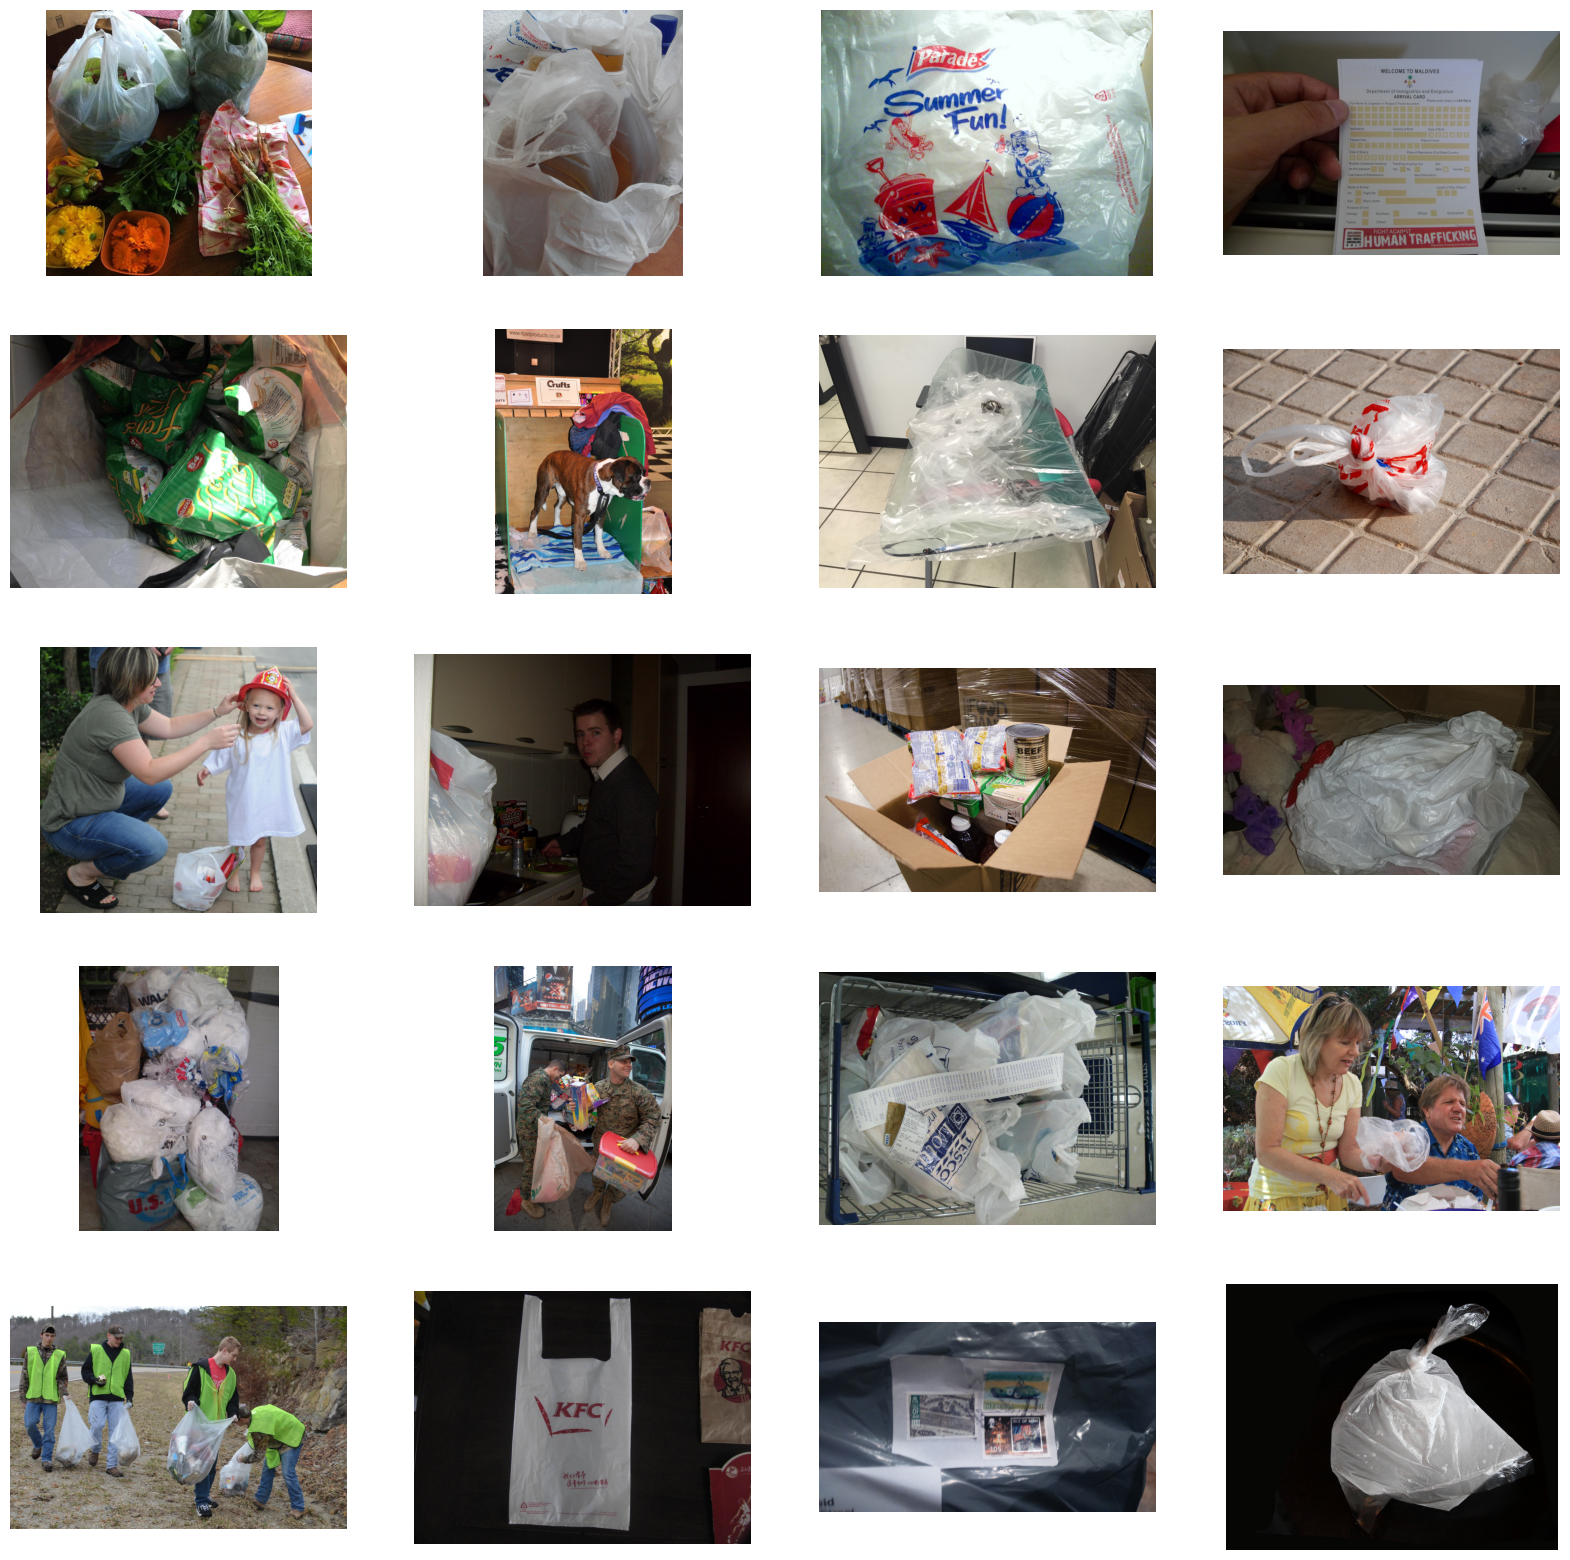

In [19]:
visualize_many(100,120,"train")

In [20]:
df_validation.loc[(df_validation["ImageID"] == "4e24222b68123ef3") & (df_validation.LabelName == "/m/05gqfk")] 

ImageID  Source  LabelName  Confidence      XMin      XMax  \
92793  4e24222b68123ef3  xclick  /m/05gqfk           1  0.377083  0.745833   

           YMin     YMax  IsOccluded  IsTruncated  IsGroupOf  IsDepiction  \
92793  0.778125  0.96875           0            0          0            0   

       IsInside  
92793         0

768 1024


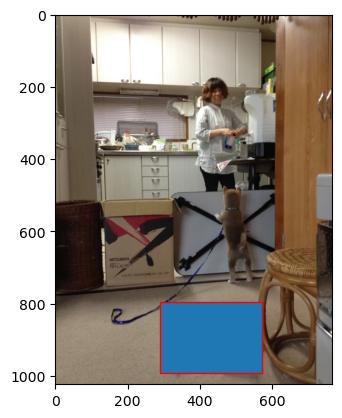

In [24]:
import matplotlib.patches as patches
from PIL import Image

im = Image.open("/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/4e24222b68123ef3.jpg")

fig, ax = plt.subplots()
ax.imshow(im)
image_width, image_height = im.size
print(image_width, image_height)

xmin = 0.377083 * image_width
xmax = 0.745833 * image_width
ymin = 0.778125 * image_height
ymax = 0.96875 * image_height

width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor=None)

ax.add_patch(rect)
plt.show()



In [38]:
validation_images_path = "/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/*.jpg"
train_images_path = "/Users/bilensezgin/Documents/Courses/unzipped/trainImages/data/*.jpg"
def visualize_bb(dataset):
    images_path = train_images_path if dataset == "train" else validation_images_path if dataset == "validation" else 0
    if images_path == 0:
        raise Exception("Invalid input parameter, must be train or validation")
    start = 0
    end = 0
    
    if dataset == "train":
        start, end, df, split = 26, 42, df_train, "trainImages"
    elif dataset == "validation":
        start, end, df, split =  31,47,df_validation, "validationImages"
    else:
        raise Exception("Invalid parameter")
    image_folder = images_path
    images_paths = glob.glob(image_folder)
    
    number_of_images = len(images_paths)
    random_int = random.randint(0, number_of_images - 1)
    random_image =images_paths[random_int]
    print(random_image)
    img = Image.open(random_image)
    id_of_image = random_image[start:end]
    
    df_rows = df.loc[(df['ImageID'] == id_of_image) & (df.LabelName == "/m/05gqfk")]
    
    image_width, image_height = img.size
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    
    for index, row in df_rows.iterrows():
        print(row["Xmin"], row["Xmax"], row["Ymin"], row["Ymax"])
        xmin = row["Xmin"]
        xmax = row["Xmax"]
        ymin = row["Ymin"]
        ymax = row["Ymax"]
        
        new_xmin = xmin * image_width
        new_xmax = xmax * image_width
        new_ymin = ymin * image_height
        new_ymax = ymax * image_height
        
        width = new_xmax - new_xmin
        height = new_ymax - new_ymin
        
        rect = patches.Rectangle(new_xmin, new_ymin, width, height, linewidth=1, edgecolor='r', facecolor=None)
        ax.add_patch(rect)


/Users/bilensezgin/Documents/Courses/unzipped/validationImages/data/b300a5975ac68399.jpg


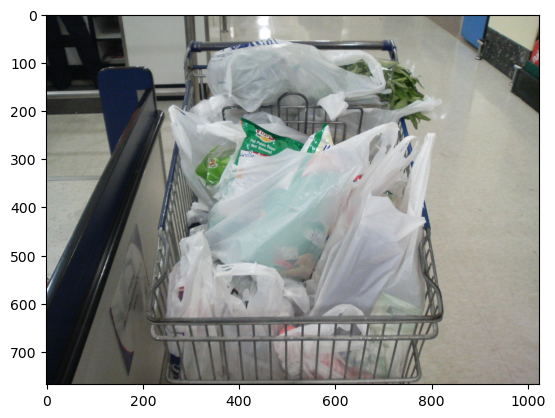

In [39]:
visualize_bb("validation")